In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('E:/projects/supervised/Iris-Species-Classification---KNN-master/Iris-Species-Classification---KNN-master/Iris.csv')

In [3]:
df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [4]:
df.shape

(150, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,150.0,75.500000,43.445368,1.0,38.25,75.50,112.75,150.0
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.10,5.80,6.40,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.80,3.00,3.30,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.60,4.35,5.10,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.30,1.30,1.80,2.5


In [7]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [8]:
df.drop('Id',axis=1,inplace=True)

In [9]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
df.groupby('Species').size()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

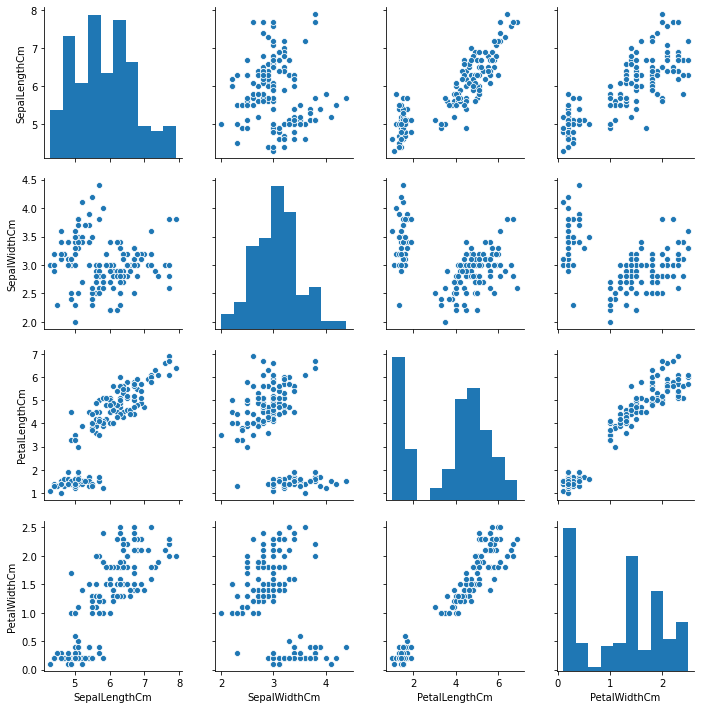

In [11]:
sns.pairplot(data=df)

In [12]:
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


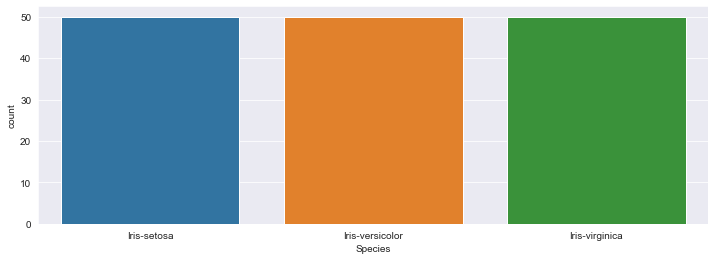

In [13]:
plt.figure(figsize=(12,4))
sns.set_style('darkgrid')
sns.countplot('Species',data=df)

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [15]:
X=df.iloc[:,:4]
y=df['Species']

In [16]:
X.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.60)

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [20]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [21]:
knn.predict(X_test)

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'I

In [22]:
pred=knn.predict(X_test)

In [23]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [24]:
round(accuracy_score(y_test,pred),3)

0.956

In [25]:
# Finding Good Value Of K:

error_rate=[]

for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_k=knn.predict(X_test)
    error_rate.append(np.mean(pred_k!=y_test))
    
    
    

    

Text(0, 0.5, 'Error Rate')

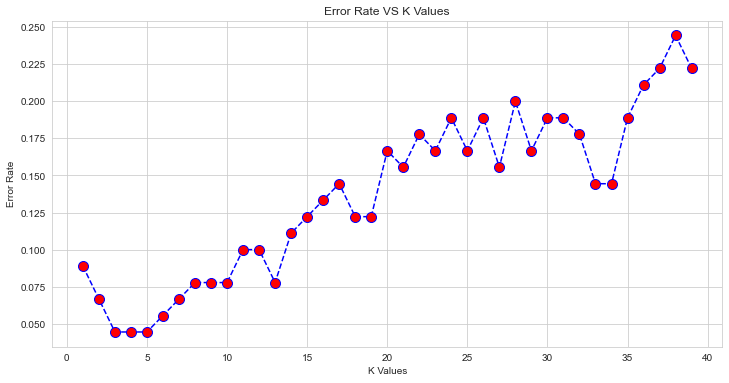

In [26]:



sns.set_style('whitegrid')
plt.figure(figsize=(12,6))
plt.plot(range(1,40),error_rate,color='blue',linestyle='dashed',marker='o',
        markerfacecolor='red', markersize=10)
plt.title('Error Rate VS K Values')
plt.xlabel('K Values')
plt.ylabel('Error Rate')

In [27]:
print(confusion_matrix(y_test,pred))

[[32  0  0]
 [ 0 28  3]
 [ 0  1 26]]


In [28]:
print(classification_report(y_test,pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        32
Iris-versicolor       0.97      0.90      0.93        31
 Iris-virginica       0.90      0.96      0.93        27

       accuracy                           0.96        90
      macro avg       0.95      0.96      0.95        90
   weighted avg       0.96      0.96      0.96        90



In [29]:
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=5')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=5


[[32  0  0]
 [ 0 29  2]
 [ 0  2 25]]


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        32
Iris-versicolor       0.94      0.94      0.94        31
 Iris-virginica       0.93      0.93      0.93        27

       accuracy                           0.96        90
      macro avg       0.95      0.95      0.95        90
   weighted avg       0.96      0.96      0.96        90



In [30]:
from sklearn.metrics import accuracy_score

In [31]:
print('Accuracy Score : ', round(accuracy_score(y_test,pred),2))

Accuracy Score :  0.96


In [32]:
from lazypredict.Supervised import LazyClassifier

C:\Users\Admin\and\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


In [33]:
#using lazypredict we can see which algorithm will give us a best prediction
clf=LazyClassifier(verbose=0,ignore_warnings=True,custom_metric=None)
models,predictions=clf.fit(X_train, X_test, y_train, y_test)

100%|██████████| 30/30 [00:04<00:00,  6.04it/s]


models

In [34]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LinearDiscriminantAnalysis,0.98,0.98,None,0.98,0.09
QuadraticDiscriminantAnalysis,0.97,0.97,None,0.97,0.04
NuSVC,0.97,0.96,None,0.97,0.05
SVC,0.96,0.96,None,0.96,0.09
AdaBoostClassifier,0.96,0.96,None,0.96,0.51
XGBClassifier,0.96,0.96,None,0.96,0.24
DecisionTreeClassifier,0.96,0.96,None,0.96,0.12
ExtraTreeClassifier,0.96,0.96,None,0.96,0.11
ExtraTreesClassifier,0.96,0.96,None,0.96,0.62


In [35]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [36]:
clf1 = LinearDiscriminantAnalysis(solver='svd')

In [37]:
clf1.fit(X_train,y_train)
pred = knn.predict(X_test)

In [38]:
print('Accuracy Score : ', round(accuracy_score(y_test,pred),2))

Accuracy Score :  0.96


In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.svm import SVC

In [42]:
def find_best_model(X, y):
    models = {
        'LinearDiscriminantAnalysis': {
            'model': LinearDiscriminantAnalysis(),
            'parameters': {
                'solver': ['svd', 'lsqr', 'eigen']
               }
        },
        
        'svm': {
            'model': SVC(gamma='auto'),
            'parameters': {
                'C': [1,10,20],
                'kernel': ['rbf','linear']
            }
        }
    }
    
    scores = [] 
    cv_shuffle = ShuffleSplit(n_splits=5, test_size=0.20, random_state=0)
        
    for model_name, model_params in models.items():
        gs = GridSearchCV(model_params['model'], model_params['parameters'], cv = cv_shuffle, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': model_name,
            'best_parameters': gs.best_params_,
            'score': gs.best_score_
        })
        
    return pd.DataFrame(scores, columns=['model','best_parameters','score'])

find_best_model(X_train, y_train)

,model,best_parameters,score
0,LinearDiscriminantAnalysis,{'solver': 'svd'},0.98
1,svm,"{'C': 1, 'kernel': 'rbf'}",0.97
